In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [4]:
class Neural_Network():
    
    def __init__(self):        
        self.ip_layer_size = 1                                                # Defining parameters
        self.op_layer_size = 1
        self.hidden_layer_size = 40
        
        self.W1 = np.random.randn(self.ip_layer_size , self.hidden_layer_size)
        self.W2 = np.random.randn(self.hidden_layer_size , self.op_layer_size)
        self.b1 = np.zeros((1 , self.hidden_layer_size))
        self.b2 = np.zeros((1 , self.op_layer_size))
        
    def forward(self, X):
        self.z2 = np.dot(X, self.W1) + self.b1
        self.a2 = np.tanh(self.z2)                                         # Feed Forward 
        self.z3 = np.dot(self.a2, self.W2) + self.b2
        yHat = self.z3 
        return yHat
        
    def costFunction(self, X, y):
        self.yHat = self.forward(X)                                        # y-self is the target value
        J = 0.5*sum((y-self.yHat)**2)                                      # yHat is the output value of the neural network 
        return J
    
    def tanh_derivative(self, z): 
                                                                   #Compute derivative of tanh
        return (1 - np.power(np.tanh(z), 2))    
    
    def costFunctionPrime(self, X, y):
                                                         # Computing derivative with respect to W and W2 for a given X and y:
        self.yHat = self.forward(X)
        
        delta3 = -(y-self.yHat)
        dJdW2 = np.dot(self.a2.T, delta3)
        dJdb2 = np.sum(delta3, axis=0)
        delta2 = np.multiply(np.dot(delta3, self.W2.T), self.tanh_derivative(self.z2))
        dJdW1 = np.dot(X.T, delta2) 
        dJdb1 = np.sum(delta2, axis=0)
        
        return dJdW1, dJdW2, dJdb1, dJdb2
    
    def train(self, learning_rate):
                                                               # Training the neural network with desired learning rate
        cost = []
        for i in range(60000):                                  #  Here , 60000 is the number of epochs
            dJdW1, dJdW2, dJdb1, dJdb2 = self.costFunctionPrime(X,y)
            self.W1 = self.W1 - learning_rate*dJdW1
            self.W2 = self.W2 - learning_rate*dJdW2             # Updating the new weights and biases after back-propagation
            self.b1 = self.b1 - learning_rate*dJdb1
            self.b2 = self.b2 - learning_rate*dJdb2
            cost.append(self.costFunction(X,y))
        return cost

### Input values 

In [6]:
X = np.array(([1], [2], [3], [4], [5], [6], [7]), dtype=float)
y = np.array(([1.0], [3.0], [3.0], [4.0], [2.0], [1.0], [4.0]), dtype=float)

In [14]:
NN = Neural_Network()
cost1 = NN.costFunction(X,y)
cost = NN.train(0.0025)                          # 0.002 as the learning rate

print("original output = ", y.T)
print("Predicted output = ", NN.forward(X).T[:])

original output =  [[ 1.  3.  3.  4.  2.  1.  4.]]
Predicted output =  [[ 0.99949965  2.99900979  2.99888573  3.99835951  1.99775207  0.99809107
   3.99726197]]


In [15]:
print("error = ", NN.costFunction(X,y))

error =  [  1.06788431e-05]


### Plotting decrease in cost with increase in epochs

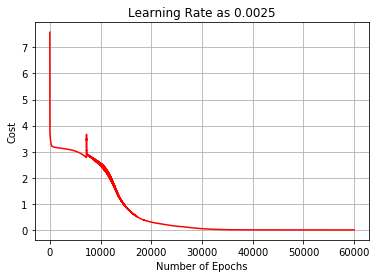

In [19]:
plt.plot(cost , 'r' )
plt.title('Learning Rate as 0.0025')
plt.xlabel("Number of Epochs")
plt.ylabel("Cost")
plt.grid()
plt.show()